#Instalando e importando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wdbc.data to wdbc.data


In [ ]:
#--------------------------------------------------
# Importanto as bibliotecas Python necessarias ao experimento
# Manipulacao matricial, matemática e visualizacao grafica
#--------------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
#--------------------------------------------------
# Processamento dos dados
#--------------------------------------------------
from sklearn.model_selection import train_test_split

#--------------------------------------------------
# Carregando o modelo inteligente e as metricas de desempenho
#--------------------------------------------------
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
#--------------------------------------------------
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




In [ ]:
# Definição das colunas para o DataFrame
columns = {
    'ID': [],
    'Diagnosis': [],
    'radius1': [],
    'texture1': [],
    'perimeter1': [],
    'area1': [],
    'smoothness1': [],
    'compactness1': [],
    'concavity1': [],
    'concave_points1': [],
    'symmetry1': [],
    'fractal_dimension1': [],
    'radius2': [],
    'texture2': [],
    'perimeter2': [],
    'area2': [],
    'smoothness2': [],
    'compactness2': [],
    'concavity2': [],
    'concave_points2': [],
    'symmetry2': [],
    'fractal_dimension2': [],
    'radius3': [],
    'texture3': [],
    'perimeter3': [],
    'area3': [],
    'smoothness3': [],
    'compactness3': [],
    'concavity3': [],
    'concave_points3': [],
    'symmetry3': [],
    'fractal_dimension3': []
}

# Leitura do arquivo CSV 'wdbc.data' com as colunas definidas
df = pd.read_csv('wdbc.data', names = columns)

# Remoção da coluna 'ID' do DataFrame
df.drop('ID', axis = 1, inplace = True)

# Mapeamento da coluna 'Diagnosis' para valores numéricos ('M' -> 1, 'B' -> 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B' : 0})

# Impressão da dimensão dos dados
print("Dimensão dos dados:")
print(df.shape)

# Impressão da estatística descritiva das variáveis
print("Estatística descritiva das variáveis:")
df.describe().transpose()

Dimensão dos dados:
(569, 31)
Estatística descritiva das variáveis:


,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#--------------------------------------------------
#Criando matrizes para os recursos e a variável de resposta
#A primeira linha de código cria um objeto da variável de destino chamado
#'target_column'.
#--------------------------------------------------
#A segunda linha nos dá a lista de todos os recursos, excluindo a variável de
#destino 'Diagnosis'
#A terceira linha normaliza os preditores.
#A quarta linha exibe o resumo dos dados normalizados.
#--------------------------------------------------
#Podemos ver que todas as variáveis ​​independentes agora foram dimensionadas entre 0 e 1.
#A variável de destino permanece inalterada.
#--------------------------------------------------
target_column = ['Diagnosis']
#--------------------------------------------------
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
print("Estatística descritiva das variáveis normalizadas:")
df[predictors].describe().transpose()

Estatística descritiva das variáveis normalizadas:


,count,mean,std,min,25%,50%,75%,max
smoothness2,569.0,0.226180,0.096451,0.055027,0.166046,0.204947,0.261677,1.0
texture3,569.0,0.518313,0.124067,0.242632,0.425515,0.512919,0.599919,1.0
symmetry2,569.0,0.260194,0.104704,0.099835,0.192020,0.237239,0.297403,1.0
concavity1,569.0,0.208058,0.186785,0.000000,0.069260,0.144189,0.306232,1.0
perimeter3,569.0,0.426995,0.133768,0.200677,0.334833,0.388774,0.499204,1.0
area1,569.0,0.261851,0.140709,0.057377,0.168053,0.220352,0.312955,1.0
area2,569.0,0.074395,0.083901,0.012545,0.032921,0.045242,0.083346,1.0
concave_points2,569.0,0.223454,0.116884,0.000000,0.144686,0.207047,0.278651,1.0
concave_points1,569.0,0.243137,0.192857,0.000000,0.100944,0.166501,0.367793,1.0
fractal_dimension2,569.0,0.127175,0.088675,0.029987,0.075335,0.106803,0.152748,1.0


Criando os conjuntos de dados de treinamento e teste

In [ ]:
#As primeiras linhas de código abaixo criam arrays das variáveis ​​independentes
# entrada_X e dependentes (saidaDesejada_y), respectivamente.
#--------------------------------------------------
#A terceira linha divide os dados em conjunto de dados de treinamento e teste,
#A quarta linha imprime a forma dos dados de treinamento e teste.

entrada_X = df[predictors].values
saidaDesejada_y = df[target_column].values

# Aplicando a funcao train_test_split para dividir o conjunto original em 70% para treindo e 30% para teste. E fixamos o random_state de 42 para fixar os valores do conjunto
X_train, X_test, y_train, y_test = train_test_split(entrada_X, saidaDesejada_y, test_size=0.3, random_state=42)


print("Conjunto de treinamento:")
print(X_train.shape);
print("Conjunto de teste:")
print(X_test.shape)

# Dividindo o conjunto de treinamento em dois subconjuntos
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Imprimindo as formas dos novos subconjuntos
print("Subconjunto 1 do conjunto de treinamento:")
print(X_train1.shape)
print("Subconjunto 2 do conjunto de treinamento:")
print(X_train2.shape)


Conjunto de treinamento:
(398, 30)
Conjunto de teste:
(171, 30)
Subconjunto 1 do conjunto de treinamento:
(199, 30)
Subconjunto 2 do conjunto de treinamento:
(199, 30)


#Função que calcula a média das métricas

In [ ]:
# Função para calcular a média das métricas
def media (lista):
  # Calculando a média para cada métrica
  mean_accuracy = np.mean([x[0] for x in lista])
  mean_recall = np.mean([x[1] for x in lista])
  mean_precision = np.mean([x[2] for x in lista])
  mean_f1 = np.mean([x[3] for x in lista])

  print(f'Média de Acurácia: {mean_accuracy}')
  print(f'Média de Recall: {mean_recall}')
  print(f'Média de Precisão: {mean_precision}')
  print(f'Média de F1 Score: {mean_f1}')

  #print('------------------------------')
  #print('--- Matriz de Confusão ---')
  #print('------------------------------')
  #pd.DataFrame(confusion_matrix(saida1, saida2),
   #            index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

#Rede Neural

Função Rede Neural

In [ ]:
# Listas para armazenar os resultados das métricas
lista1 = []
lista2 = []
lista3 = []

def redeNeural(neuronios,ativacao) :
  # Loop para realizar o procedimento 100 vezes
  for i in range(1, 100) :

    #Inicializa o classificador MLP com o número de neurônios e função de ativação especificados
    mlp = MLPClassifier(hidden_layer_sizes=(neuronios), activation=ativacao, solver='adam', max_iter=500, random_state=None)

    # Treina o modelo no primeiro conjunto de treinamento
    mlp.fit(X_train1, y_train1)
    predict_train = mlp.predict(X_train1)

    saidaPrevista_treino = predict_train
    saidaDesejada_treino =  y_train1

    # Verifica as métricas de desempenho no primeiro conjunto de treinamento
    accuracy_train = accuracy_score(saidaDesejada_treino, saidaPrevista_treino)
    recall_train = recall_score(saidaDesejada_treino, saidaPrevista_treino)
    precision_train = precision_score(saidaDesejada_treino, saidaPrevista_treino)
    f1_train = f1_score(saidaDesejada_treino, saidaPrevista_treino)
    lista1.append((accuracy_train,recall_train,precision_train,f1_train))

    # Treina o modelo no segundo conjunto de treinamento
    mlp.fit(X_train2, y_train2)
    predict_train = mlp.predict(X_train2)

    saidaPrevista_treino = predict_train
    saidaDesejada_treino =  y_train2

    # Verifica as métricas de desempenho no segundo conjunto de treinamento
    accuracy_train = accuracy_score(saidaDesejada_treino, saidaPrevista_treino)
    recall_train = recall_score(saidaDesejada_treino, saidaPrevista_treino)
    precision_train = precision_score(saidaDesejada_treino, saidaPrevista_treino)
    f1_train = f1_score(saidaDesejada_treino, saidaPrevista_treino)
    lista2.append((accuracy_train,recall_train,precision_train,f1_train))

  # Treina o modelo no conjunto de teste com uma configuração fixa (random_state 42)
  mlp = MLPClassifier(hidden_layer_sizes=(neuronios), activation=ativacao, solver='adam', max_iter=500, random_state=42)
  mlp.fit(X_test,y_test)
  predict_test = mlp.predict(X_test)
  saidaPrevista_test = predict_test
  saidaDesejada_test = y_test

  # Imprime as médias das métricas para o primeiro conjunto de treinamento
  print("\nConjunto de treinamento 1:")
  media(lista1)

  # Imprime as médias das métricas para o segundo conjunto de treinamento
  print("\nConjunto de treinamento 2:")
  media(lista2)


  # Verifica as métricas de desempenho no conjunto de teste
  accuracy_test = accuracy_score(saidaDesejada_test, saidaPrevista_test)
  recall_test = recall_score(saidaDesejada_test, saidaPrevista_test)
  precision_test = precision_score(saidaDesejada_test, saidaPrevista_test)
  f1_test = f1_score(saidaDesejada_test, saidaPrevista_test)
  lista3.append((accuracy_test,recall_test,precision_test,f1_test))

  # Imprime as métricas de desempenho no conjunto de teste
  print('------------------------------')
  print('------------------------------')
  print('Conjunto de teste')
  print('Acurácia: ', accuracy_test)
  print('Recall: ', recall_test)
  print('Precision: ', precision_test)
  print('f1 Score: ', f1_test)
  print('------------------------------')
  print('------------------------------')

  return lista1, lista2, lista3


Chama a função redeNeural de 5 a 100 neurônios na camada oculta e usando a função de ativação tangente hiperbólica (tanh)

In [ ]:
l1,l2,l3 = redeNeural(5,'tanh')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9375666209837065
Média de Recall: 0.883116883116883
Média de Precisão: 0.9522632398945864
Média de F1 Score: 0.9160758200942369

Conjunto de treinamento 2:
Média de Acurácia: 0.9252829805593623
Média de Recall: 0.8114478114478115
Média de Precisão: 0.9786333106858219
Média de F1 Score: 0.8863947061040656
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9473684210526315
Recall:  0.873015873015873
Precision:  0.9821428571428571
f1 Score:  0.9243697478991596
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(20,'tanh')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9501040556316936
Média de Recall: 0.9157155975337793
Média de Precisão: 0.953528513257471
Média de F1 Score: 0.9337623141847325

Conjunto de treinamento 2:
Média de Acurácia: 0.9466016953454138
Média de Recall: 0.862303591470258
Média de Precisão: 0.988310972299971
Média de F1 Score: 0.919999637502433
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9707602339181286
Recall:  0.9365079365079365
Precision:  0.9833333333333333
f1 Score:  0.9593495934959351
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(30,'tanh')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9576671234962694
Média de Recall: 0.9318291136472953
Média de Precisão: 0.9575482601029133
Média de F1 Score: 0.9441048167325197

Conjunto de treinamento 2:
Média de Acurácia: 0.956127438539499
Média de Recall: 0.8855686494575382
Média de Precisão: 0.9919551052600241
Média de F1 Score: 0.9348135025240052
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9649122807017544
Recall:  0.9206349206349206
Precision:  0.9830508474576272
f1 Score:  0.9508196721311476
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(50,'tanh')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9339167942338881
Média de Recall: 0.9123326435513415
Média de Precisão: 0.9114791483354088
Média de F1 Score: 0.9108190184710928

Conjunto de treinamento 2:
Média de Acurácia: 0.9335297385304914
Média de Recall: 0.907449732505381
Média de Precisão: 0.9141859710612401
Média de F1 Score: 0.9097836288778712
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9707602339181286
Recall:  0.9365079365079365
Precision:  0.9833333333333333
f1 Score:  0.9593495934959351
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(100,'tanh')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.967900106593574
Média de Recall: 0.9479732388823296
Média de Precisão: 0.9683143480576661
Média de F1 Score: 0.9577649301114844

Conjunto de treinamento 2:
Média de Acurácia: 0.9664687071722249
Média de Recall: 0.9132996632996634
Média de Precisão: 0.9932448962921464
Média de F1 Score: 0.9507093121916128
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9941520467836257
Recall:  0.9841269841269841
Precision:  1.0
f1 Score:  0.9919999999999999
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Chama a função redeNeural de 5 a 100 neurônios na camada oculta e usando a função de ativação identidade (identity)

In [ ]:
l1,l2,l3 = redeNeural(5,'identity')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9633351944909734
Média de Recall: 0.9391097118369844
Média de Precisão: 0.9650426168906514
Média de F1 Score: 0.9515967044497674

Conjunto de treinamento 2:
Média de Acurácia: 0.9598666734345128
Média de Recall: 0.8980780022446689
Média de Precisão: 0.9896380575882416
Média de F1 Score: 0.9406219814721453
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9473684210526315
Recall:  0.873015873015873
Precision:  0.9821428571428571
f1 Score:  0.9243697478991596
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(20,'identity')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9627357567056061
Média de Recall: 0.9395438616217837
Média de Precisão: 0.9631424254971239
Média de F1 Score: 0.9509152921551813

Conjunto de treinamento 2:
Média de Acurácia: 0.9609011870318405
Média de Recall: 0.9000521083854417
Média de Precisão: 0.9906796058410213
Média de F1 Score: 0.9423075933417494
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9707602339181286
Recall:  0.9365079365079365
Precision:  0.9833333333333333
f1 Score:  0.9593495934959351
------------------------------
------------------------------


In [ ]:
l1,l2,l3 = redeNeural(30,'identity')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9634409420841581
Média de Recall: 0.9416404302767937
Média de Precisão: 0.9629678520683329
Média de F1 Score: 0.9519228325775146

Conjunto de treinamento 2:
Média de Acurácia: 0.9625463174458151
Média de Recall: 0.9037422839506173
Média de Precisão: 0.9916774694199927
Média de F1 Score: 0.9448688603943378
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9649122807017544
Recall:  0.9206349206349206
Precision:  0.9830508474576272
f1 Score:  0.9508196721311476
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(50,'identity')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9334991367069017
Média de Recall: 0.9118010449097225
Média de Precisão: 0.9108823665814841
Média de F1 Score: 0.9102450380303148

Conjunto de treinamento 2:
Média de Acurácia: 0.933100027200646
Média de Recall: 0.907099099741616
Média de Precisão: 0.9133988670321098
Média de F1 Score: 0.9092122026687448
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9649122807017544
Recall:  0.9206349206349206
Precision:  0.9830508474576272
f1 Score:  0.9508196721311476
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(100,'identity')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9672554692655196
Média de Recall: 0.947461629279811
Média de Precisão: 0.9671674556966442
Média de F1 Score: 0.956994374783769

Conjunto de treinamento 2:
Média de Acurácia: 0.9661489264504342
Média de Recall: 0.9134960718294052
Média de Precisão: 0.992057074405206
Média de F1 Score: 0.950401319745364
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9941520467836257
Recall:  0.9841269841269841
Precision:  1.0
f1 Score:  0.9919999999999999
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Chama a função redeNeural de 5 a 100 neurônios na camada oculta e usando a função de ativação ReLU (Rectified Linear Unit)

In [ ]:
l1,l2,l3 = redeNeural(5,'relu')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9605188476819357
Média de Recall: 0.9367941516701846
Média de Precisão: 0.9602703438487217
Média de F1 Score: 0.9472067845888335

Conjunto de treinamento 2:
Média de Acurácia: 0.9555121798155148
Média de Recall: 0.8981353943475155
Média de Precisão: 0.9807489504515704
Média de F1 Score: 0.9348418118844749
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.8830409356725146
Recall:  0.6984126984126984
Precision:  0.9777777777777777
f1 Score:  0.8148148148148148
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(20,'relu')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9604546300526199
Média de Recall: 0.9371638462547554
Média de Precisão: 0.9597571209857741
Média de F1 Score: 0.947232642065293

Conjunto de treinamento 2:
Média de Acurácia: 0.9560259208500415
Média de Recall: 0.8979610924055369
Média de Precisão: 0.9821708129682906
Média de F1 Score: 0.9356163302859997
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9473684210526315
Recall:  0.8888888888888888
Precision:  0.9655172413793104
f1 Score:  0.9256198347107438
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(30,'relu')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9611694837825492
Média de Recall: 0.9389701207883027
Média de Precisão: 0.9598650689572183
Média de F1 Score: 0.9482805222447381

Conjunto de treinamento 2:
Média de Acurácia: 0.9570658264125601
Média de Recall: 0.8993568160234826
Média de Precisão: 0.9835185622966535
Média de F1 Score: 0.9371842832193984
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9649122807017544
Recall:  0.9206349206349206
Precision:  0.9830508474576272
f1 Score:  0.9508196721311476
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(50,'relu')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9623478141066082
Média de Recall: 0.941127415153389
Média de Precisão: 0.9608047196370401
Média de F1 Score: 0.9499086599754615

Conjunto de treinamento 2:
Média de Acurácia: 0.958617039019049
Média de Recall: 0.9023869648869648
Média de Precisão: 0.9846644382503056
Média de F1 Score: 0.9395132613446965
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9824561403508771
Recall:  0.9682539682539683
Precision:  0.9838709677419355
f1 Score:  0.976
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
l1,l2,l3 = redeNeural(100,'relu')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9640593540091028
Média de Recall: 0.9433206524115614
Média de Precisão: 0.963081958566287
Média de F1 Score: 0.9522060661077988

Conjunto de treinamento 2:
Média de Acurácia: 0.9602828959612881
Média de Recall: 0.9060044893378225
Média de Precisão: 0.9855516988556422
Média de F1 Score: 0.9420017596745576
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9941520467836257
Recall:  0.9841269841269841
Precision:  1.0
f1 Score:  0.9919999999999999
------------------------------
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Distribuição das instancias:

In [ ]:
# Distribuicao das instancias
B, M = df['Diagnosis'].value_counts()
print('Benignos : ',B)
print('Malignos : ',M)
print('---------------------')
print('Proporção de Benignos: ', 100*B/(B+M))
print('Proporção de Malignos: ', 100*M/(B+M))

Benignos :  357
Malignos :  212
---------------------
Proporção de Benignos:  62.74165202108963
Proporção de Malignos:  37.25834797891037


#KNN

Função KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Listas para armazenar os resultados das métricas
lista1 = []
lista2 = []
lista3 = []
lista4 = []

def knn(n_neighbors):
    # Loop para realizar o procedimento 100 vezes
    for i in range(100):
        # Divide o conjunto de treinamento em dois subconjuntos, sem random_state para aleatoriedade
        X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5, random_state=None)

        # Converte os vetores de rótulos para arrays unidimensionais
        y_train1 = np.ravel(y_train1)
        y_train2 = np.ravel(y_train2)

        # Conjunto de treinamento 1
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train1, y_train1)
        y_pred = knn.predict(X_train1)
        accuracy_train3 = accuracy_score(y_train1, y_pred)
        recall_train3 = recall_score(y_train1, y_pred)
        precision_train3 = precision_score(y_train1, y_pred)
        f1_train3 = f1_score(y_train1, y_pred)
        lista3.append((accuracy_train3, recall_train3, precision_train3, f1_train3))

        # Conjunto de treinamento 2
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train2, y_train2)
        y_pred = knn.predict(X_train2)
        accuracy_train4 = accuracy_score(y_train2, y_pred)
        recall_train4 = recall_score(y_train2, y_pred)
        precision_train4 = precision_score(y_train2, y_pred)
        f1_train4 = f1_score(y_train2, y_pred)
        lista4.append((accuracy_train4, recall_train4, precision_train4, f1_train4))

        # Conjunto de teste 1
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train1, y_train1)
        y_pred = knn.predict(X_test)
        accuracy_train1 = accuracy_score(y_test, y_pred)
        recall_train1 = recall_score(y_test, y_pred)
        precision_train1 = precision_score(y_test, y_pred)
        f1_train1 = f1_score(y_test, y_pred)
        lista1.append((accuracy_train1, recall_train1, precision_train1, f1_train1))

        # Conjunto de teste 2
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train2, y_train2)
        y_pred = knn.predict(X_test)
        accuracy_train2 = accuracy_score(y_test, y_pred)
        recall_train2 = recall_score(y_test, y_pred)
        precision_train2 = precision_score(y_test, y_pred)
        f1_train2 = f1_score(y_test, y_pred)
        lista2.append((accuracy_train2, recall_train2, precision_train2, f1_train2))

        # Imprime as médias das métricas para cada conjunto
    print('Conjunto de teste 1')
    media(lista1)
    print('\nConjunto de teste 2')
    media(lista2)
    print('\nConjunto de treinamento 1')
    media(lista3)
    print('\nConjunto de treinamento 2')
    media(lista4)

    return lista1, lista2, lista3, lista4




Executando a função KNN e Imprimindo as médias das métricas para cada conjunto

In [ ]:
# Executa a função KNN e armazena os resultados
lista1,lista2,lista3,lista4 = knn(1)

Conjunto de teste 1
Média de Acurácia: 0.935295184789608
Média de Recall: 0.9111359991150934
Média de Precisão: 0.916159857390433
Média de F1 Score: 0.9127098954928

Conjunto de teste 2
Média de Acurácia: 0.9340390313734247
Média de Recall: 0.9020959501686854
Média de Precisão: 0.9199418731395189
Média de F1 Score: 0.9094391894328773

Conjunto de treinamento 1
Média de Acurácia: 0.9848201490769984
Média de Recall: 0.969410536187167
Média de Precisão: 0.9897725886636592
Média de F1 Score: 0.979249348288243

Conjunto de treinamento 2
Média de Acurácia: 0.9845966675482678
Média de Recall: 0.9693070150179213
Média de Precisão: 0.9894262999500983
Média de F1 Score: 0.9790263440151519


In [ ]:
lista1,lista2,lista3,lista4 = knn(3)

Conjunto de teste 1
Média de Acurácia: 0.9363116262761445
Média de Recall: 0.9119829345204971
Média de Precisão: 0.9179184578296586
Média de F1 Score: 0.9140336723619596

Conjunto de teste 2
Média de Acurácia: 0.9351201035393018
Média de Recall: 0.9034593038662321
Média de Precisão: 0.9214463793728581
Média de F1 Score: 0.9109245640231795

Conjunto de treinamento 1
Média de Acurácia: 0.9845194415307034
Média de Recall: 0.9686675393553493
Média de Precisão: 0.9896978607124923
Média de F1 Score: 0.9788362925288975

Conjunto de treinamento 2
Média de Acurácia: 0.9843015075376886
Média de Recall: 0.9685980669522462
Média de Precisão: 0.9893186465742004
Média de F1 Score: 0.9786131249856032


In [ ]:
lista1,lista2,lista3,lista4 = knn(5)

Conjunto de teste 1
Média de Acurácia: 0.9570370370370371
Média de Recall: 0.9306349206349207
Média de Precisão: 0.9522322512377336
Média de F1 Score: 0.9410888458933623

Conjunto de teste 2
Média de Acurácia: 0.9579142300194932
Média de Recall: 0.9326455026455028
Média de Precisão: 0.9526376651463471
Média de F1 Score: 0.9423200975756622

Conjunto de treinamento 1
Média de Acurácia: 0.9834338358458962
Média de Recall: 0.9632590159326098
Média de Precisão: 0.9921680577405247
Média de F1 Score: 0.9772407806927798

Conjunto de treinamento 2
Média de Acurácia: 0.9838525963149078
Média de Recall: 0.9645295130840399
Média de Precisão: 0.9918413092351541
Média de F1 Score: 0.9777849168482268


In [ ]:
lista1,lista2,lista3,lista4 = knn(7)

Conjunto de teste 1
Média de Acurácia: 0.9571198830409358
Média de Recall: 0.9277380952380954
Média de Precisão: 0.9551469966295566
Média de F1 Score: 0.9410005681078075

Conjunto de teste 2
Média de Acurácia: 0.9576900584795323
Média de Recall: 0.9307539682539684
Média de Precisão: 0.9538135728677125
Média de F1 Score: 0.941912999358286

Conjunto de treinamento 1
Média de Acurácia: 0.9803140703517589
Média de Recall: 0.9556314131553532
Média de Precisão: 0.9911320643174313
Média de F1 Score: 0.9727671168236637

Conjunto de treinamento 2
Média de Acurácia: 0.9802638190954776
Média de Recall: 0.9572197138918966
Média de Precisão: 0.9898035642216476
Média de F1 Score: 0.9730020537730849


In [ ]:
lista1,lista2,lista3,lista4 = knn(9)

Conjunto de teste 1
Média de Acurácia: 0.9565614035087721
Média de Recall: 0.9250793650793652
Média de Precisão: 0.9561333901903037
Média de F1 Score: 0.9400958316202948

Conjunto de teste 2
Média de Acurácia: 0.956748538011696
Média de Recall: 0.9269523809523811
Média de Precisão: 0.9548538217311624
Média de F1 Score: 0.9404435071456175

Conjunto de treinamento 1
Média de Acurácia: 0.9776281407035176
Média de Recall: 0.9491078867500454
Média de Precisão: 0.9904940086757242
Média de F1 Score: 0.9690408012634933

Conjunto de treinamento 2
Média de Acurácia: 0.9778090452261308
Média de Recall: 0.950671887374454
Média de Precisão: 0.9895089620673319
Média de F1 Score: 0.9694351942025351


In [ ]:
lista1,lista2,lista3,lista4 = knn(11)

Conjunto de teste 1
Média de Acurácia: 0.9556822612085771
Média de Recall: 0.9216931216931217
Média de Precisão: 0.9569469991642492
Média de F1 Score: 0.9387252115750868

Conjunto de teste 2
Média de Acurácia: 0.9558382066276803
Média de Recall: 0.9235978835978838
Média de Precisão: 0.9555667048033295
Média de F1 Score: 0.9390408062668937

Conjunto de treinamento 1
Média de Acurácia: 0.9751591289782245
Média de Recall: 0.9427375594279258
Média de Precisão: 0.9900745524385093
Média de F1 Score: 0.9654790688194136

Conjunto de treinamento 2
Média de Acurácia: 0.975569514237856
Média de Recall: 0.9453004910704556
Média de Precisão: 0.9889340216770427
Média de F1 Score: 0.9663290437439186


In [ ]:
lista1,lista2,lista3,lista4 = knn(13)

Conjunto de teste 1
Média de Acurácia: 0.9368483240350801
Média de Recall: 0.9114774114774116
Média de Precisão: 0.9196789635051672
Média de F1 Score: 0.9146505789153321

Conjunto de teste 2
Média de Acurácia: 0.9356670517077816
Média de Recall: 0.9033016318172569
Média de Precisão: 0.9229576984911089
Média de F1 Score: 0.9116180974364815

Conjunto de treinamento 1
Média de Acurácia: 0.9834472151744426
Média de Recall: 0.9658443959533821
Média de Precisão: 0.9896653410166688
Média de F1 Score: 0.9773323710667846

Conjunto de treinamento 2
Média de Acurácia: 0.9831706149796602
Média de Recall: 0.9654615399387031
Média de Precisão: 0.9893445722098368
Média de F1 Score: 0.9769658996324493


In [ ]:
lista1,lista2,lista3,lista4 = knn(15)

Conjunto de teste 1
Média de Acurácia: 0.9537865497076026
Média de Recall: 0.9157539682539684
Média de Precisão: 0.9574203221441053
Média de F1 Score: 0.9358542705120972

Conjunto de teste 2
Média de Acurácia: 0.9539108187134504
Média de Recall: 0.9173015873015875
Média de Precisão: 0.9562775758875918
Média de F1 Score: 0.9361047346979867

Conjunto de treinamento 1
Média de Acurácia: 0.9715263819095478
Média de Recall: 0.933923103377555
Média de Precisão: 0.9892010234361783
Média de F1 Score: 0.960391087197309

Conjunto de treinamento 2
Média de Acurácia: 0.9715389447236182
Média de Recall: 0.9344900322731072
Média de Precisão: 0.9885975428375651
Média de F1 Score: 0.9603913495758922


In [ ]:
lista1,lista2,lista3,lista4 = knn(17)

Conjunto de teste 1
Média de Acurácia: 0.9530344379467187
Média de Recall: 0.9133862433862435
Média de Precisão: 0.9576292108382882
Média de F1 Score: 0.9347119949310422

Conjunto de teste 2
Média de Acurácia: 0.9531189083820664
Média de Recall: 0.9147266313932982
Média de Precisão: 0.9565703639498345
Média de F1 Score: 0.934897391446032

Conjunto de treinamento 1
Média de Acurácia: 0.9699776661083196
Média de Recall: 0.9299747253739256
Média de Precisão: 0.9888700384852214
Média de F1 Score: 0.958121249069401

Conjunto de treinamento 2
Média de Acurácia: 0.9695086543830264
Média de Recall: 0.9297571778711434
Média de Precisão: 0.9879086793011658
Média de F1 Score: 0.9575337618986095


In [ ]:
lista1,lista2,lista3,lista4 = knn(19)

Conjunto de teste 1
Média de Acurácia: 0.9524444444444445
Média de Recall: 0.9111904761904763
Média de Precisão: 0.9581142071107895
Média de F1 Score: 0.9337923080246635

Conjunto de teste 2
Média de Acurácia: 0.9524561403508773
Média de Recall: 0.9123333333333336
Média de Precisão: 0.9570426929327783
Média de F1 Score: 0.933871774116229

Conjunto de treinamento 1
Média de Acurácia: 0.9682763819095479
Média de Recall: 0.9255301718111425
Média de Precisão: 0.9885652788596233
Média de F1 Score: 0.9555699744758911

Conjunto de treinamento 2
Média de Acurácia: 0.9680502512562816
Média de Recall: 0.9260375120866404
Média de Precisão: 0.9878018987800585
Média de F1 Score: 0.9554906266198248


In [ ]:
lista1,lista2,lista3,lista4 = knn(21)

Conjunto de teste 1
Média de Acurácia: 0.9520520999468367
Média de Recall: 0.9094949494949496
Média de Precisão: 0.9586691538095101
Média de F1 Score: 0.933166380336336

Conjunto de teste 2
Média de Acurácia: 0.9519351408825093
Média de Recall: 0.9103030303030304
Média de Precisão: 0.9575599960087419
Média de F1 Score: 0.9330554795943184

Conjunto de treinamento 1
Média de Acurácia: 0.966660575605299
Média de Recall: 0.9216585211815121
Média de Precisão: 0.9880617871710042
Média de F1 Score: 0.953243727210966

Conjunto de treinamento 2
Média de Acurácia: 0.9665280950205573
Média de Recall: 0.9223660928630841
Média de Precisão: 0.9873458690742122
Média de F1 Score: 0.9533001157144467


In [ ]:
lista1,lista2,lista3,lista4 = knn(23)

Conjunto de teste 1
Média de Acurácia: 0.9516569200779729
Média de Recall: 0.907830687830688
Média de Precisão: 0.9591892559963991
Média de F1 Score: 0.9325367438389045

Conjunto de teste 2
Média de Acurácia: 0.9515204678362573
Média de Recall: 0.908597883597884
Média de Precisão: 0.9580553532910062
Média de F1 Score: 0.9323967095390026

Conjunto de treinamento 1
Média de Acurácia: 0.9651716917922948
Média de Recall: 0.9182280022464688
Média de Precisão: 0.9874486217105894
Média de F1 Score: 0.951093846301272

Conjunto de treinamento 2
Média de Acurácia: 0.9650879396984925
Média de Recall: 0.9185480498190126
Média de Precisão: 0.9871837205213391
Média de F1 Score: 0.9511324274116222


In [ ]:
lista1,lista2,lista3,lista4 = knn(25)

Conjunto de teste 1
Média de Acurácia: 0.9512865497076025
Média de Recall: 0.9063492063492063
Média de Precisão: 0.9596025371044408
Média de F1 Score: 0.9319506004273147

Conjunto de teste 2
Média de Acurácia: 0.9512190733243364
Média de Recall: 0.9071672771672773
Média de Precisão: 0.9586091638750729
Média de F1 Score: 0.931906143033229

Conjunto de treinamento 1
Média de Acurácia: 0.9637301894085814
Média de Recall: 0.9149412899738781
Média de Precisão: 0.9868188886271407
Média de F1 Score: 0.94902461847524

Conjunto de treinamento 2
Média de Acurácia: 0.963838422883649
Média de Recall: 0.9154093902867033
Média de Precisão: 0.9869172256778344
Média de F1 Score: 0.9493134497526654


In [ ]:
lista1,lista2,lista3,lista4 = knn(27)

Conjunto de teste 1
Média de Acurácia: 0.950998329156224
Média de Recall: 0.9050453514739232
Média de Precisão: 0.960075524989223
Média de F1 Score: 0.9314839360460286

Conjunto de teste 2
Média de Acurácia: 0.9508604845446952
Média de Recall: 0.9057142857142859
Média de Precisão: 0.9590239674765613
Média de F1 Score: 0.9313354780619982

Conjunto de treinamento 1
Média de Acurácia: 0.9623295046661882
Média de Recall: 0.9116137682820009
Média de Precisão: 0.9863287231393428
Média de F1 Score: 0.9469811678304102

Conjunto de treinamento 2
Média de Acurácia: 0.9625592246949032
Média de Recall: 0.9123867301009297
Média de Precisão: 0.9863822273822763
Média de F1 Score: 0.9474252116302901


In [ ]:
lista1,lista2,lista3,lista4 = knn(29)

Conjunto de teste 1
Média de Acurácia: 0.9372558192796763
Média de Recall: 0.9105889402499571
Média de Precisão: 0.921474677353389
Média de F1 Score: 0.915075116993167

Conjunto de teste 2
Média de Acurácia: 0.9360727442617714
Média de Recall: 0.9026424963924965
Média de Precisão: 0.924578576273508
Média de F1 Score: 0.9120908122786071

Conjunto de treinamento 1
Média de Acurácia: 0.9816081660678128
Média de Recall: 0.9611297673031736
Média de Precisão: 0.9894067626286793
Média de F1 Score: 0.97466379889044

Conjunto de treinamento 2
Média de Acurácia: 0.9814938328003655
Média de Recall: 0.9612020327407512
Média de Precisão: 0.9889675754045038
Média de F1 Score: 0.9745016477342636


#Arvore de decisão

Função de Árvore de decisão

Racionalização dos Parâmetros Escolhidos:

  max_depth: Limita a profundidade máxima da árvore para evitar overfitting. Valores como 10, 20 e 30 são escolhas razoáveis, pois controlam a complexidade da árvore.

  min_samples_split: Define o número mínimo de amostras necessárias para dividir um nó. Valores maiores como 5 ou 10 podem ajudar a simplificar a árvore, reduzindo o overfitting.
  
  min_samples_leaf: Define o número mínimo de amostras permitidas em uma folha. Valores maiores como 2 ou 4 ajudam a regularizar o modelo, evitando folhas com muito poucas amostras.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Listas para armazenar os resultados das métricas
lista1 = []  # Resultados para conjunto de teste com o primeiro subconjunto de treinamento
lista2 = []  # Resultados para conjunto de teste com o segundo subconjunto de treinamento
lista3 = []  # Resultados para o primeiro subconjunto de treinamento
lista4 = []  # Resultados para o segundo subconjunto de treinamento

def decision_tree(max_depth, min_samples_split, min_samples_leaf):
    # Loop para realizar o procedimento 100 vezes
    for i in range(100):
        # Divide o conjunto de treinamento em dois subconjuntos, sem random_state para aleatoriedade
        X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5, random_state=None)

        # Converte os vetores de rótulos para arrays unidimensionais
        y_train1 = np.ravel(y_train1)
        y_train2 = np.ravel(y_train2)

        # Conjunto de treinamento 1
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        dt.fit(X_train1, y_train1)
        y_pred = dt.predict(X_train1)
        accuracy_train3 = accuracy_score(y_train1, y_pred)
        recall_train3 = recall_score(y_train1, y_pred)
        precision_train3 = precision_score(y_train1, y_pred)
        f1_train3 = f1_score(y_train1, y_pred)
        lista3.append((accuracy_train3, recall_train3, precision_train3, f1_train3))

        # Conjunto de treinamento 2
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        dt.fit(X_train2, y_train2)
        y_pred = dt.predict(X_train2)
        accuracy_train4 = accuracy_score(y_train2, y_pred)
        recall_train4 = recall_score(y_train2, y_pred)
        precision_train4 = precision_score(y_train2, y_pred)
        f1_train4 = f1_score(y_train2, y_pred)
        lista4.append((accuracy_train4, recall_train4, precision_train4, f1_train4))

        # Conjunto de teste 1
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        dt.fit(X_train1, y_train1)
        y_pred = dt.predict(X_test)
        accuracy_train1 = accuracy_score(y_test, y_pred)
        recall_train1 = recall_score(y_test, y_pred)
        precision_train1 = precision_score(y_test, y_pred)
        f1_train1 = f1_score(y_test, y_pred)
        lista1.append((accuracy_train1, recall_train1, precision_train1, f1_train1))

        # Conjunto de teste 2
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        dt.fit(X_train2, y_train2)
        y_pred = dt.predict(X_test)
        accuracy_train2 = accuracy_score(y_test, y_pred)
        recall_train2 = recall_score(y_test, y_pred)
        precision_train2 = precision_score(y_test, y_pred)
        f1_train2 = f1_score(y_test, y_pred)
        lista2.append((accuracy_train2, recall_train2, precision_train2, f1_train2))

    print('Conjunto de teste 1')
    media(lista1)
    print('\nConjunto de teste 2')
    media(lista2)
    print('\nConjunto de treinamento 1')
    media(lista3)
    print('\nConjunto de treinamento 2')
    media(lista4)

    return lista1, lista2, lista3, lista4

Chamando a função da árvore de decisão:

In [ ]:
# Chame a função e obtenha os resultados
resultados = decision_tree(None, 2, 2)

Conjunto de teste 1
Média de Acurácia: 0.9284795321637427
Média de Recall: 0.9068253968253969
Média de Precisão: 0.9010910457222023
Média de F1 Score: 0.9034285748729678

Conjunto de teste 2
Média de Acurácia: 0.9312865497076023
Média de Recall: 0.9071428571428574
Média de Precisão: 0.9077281155990521
Média de F1 Score: 0.9067921966225354

Conjunto de treinamento 1
Média de Acurácia: 0.9868844221105529
Média de Recall: 0.9674234212014328
Média de Precisão: 0.9978453255361933
Média de F1 Score: 0.9823241435951262

Conjunto de treinamento 2
Média de Acurácia: 0.9868341708542713
Média de Recall: 0.9675057266268371
Média de Precisão: 0.9971292872798208
Média de F1 Score: 0.9820300418827921


In [ ]:
resultados = decision_tree( 10, 10, 2)

Conjunto de teste 1
Média de Acurácia: 0.9297368421052632
Média de Recall: 0.9057142857142858
Média de Precisão: 0.9052568583932197
Média de F1 Score: 0.904771401076232

Conjunto de teste 2
Média de Acurácia: 0.930233918128655
Média de Recall: 0.9073015873015874
Média de Precisão: 0.9056966499463237
Média de F1 Score: 0.9055024507246947

Conjunto de treinamento 1
Média de Acurácia: 0.9822613065326635
Média de Recall: 0.9614927406619452
Média de Precisão: 0.990814325316579
Média de F1 Score: 0.9757630526443418

Conjunto de treinamento 2
Média de Acurácia: 0.981708542713568
Média de Recall: 0.9614775289865339
Média de Precisão: 0.989644349623289
Média de F1 Score: 0.9751600697789516


In [ ]:
resultados = decision_tree( 20, 5, 1)

Conjunto de teste 1
Média de Acurácia: 0.9286744639376218
Média de Recall: 0.9112698412698413
Média de Precisão: 0.8985779377819761
Média de F1 Score: 0.9040800341804717

Conjunto de teste 2
Média de Acurácia: 0.9284600389863549
Média de Recall: 0.9102116402116404
Média de Precisão: 0.8990380322427914
Média de F1 Score: 0.9036857937594709

Conjunto de treinamento 1
Média de Acurácia: 0.9862311557788945
Média de Recall: 0.9703525020117943
Média de Precisão: 0.9926969355467689
Média de F1 Score: 0.9812392892407926

Conjunto de treinamento 2
Média de Acurácia: 0.9856951423785593
Média de Recall: 0.9695845298570744
Média de Precisão: 0.992152038693648
Média de F1 Score: 0.9805710480527438


In [ ]:
resultados = decision_tree(40, 2, 4)

Conjunto de teste 1
Média de Acurácia: 0.92906432748538
Média de Recall: 0.9074603174603176
Média de Precisão: 0.9025630959913093
Média de F1 Score: 0.9041488279197257

Conjunto de teste 2
Média de Acurácia: 0.9286842105263158
Média de Recall: 0.9096428571428572
Média de Precisão: 0.9000222456772522
Média de F1 Score: 0.9039158803150614

Conjunto de treinamento 1
Média de Acurácia: 0.9826507537688444
Média de Recall: 0.9637977302000403
Média de Precisão: 0.9896654372103597
Média de F1 Score: 0.9763456647601053

Conjunto de treinamento 2
Média de Acurácia: 0.9820979899497488
Média de Recall: 0.9635362321063602
Média de Precisão: 0.9883889077617125
Média de F1 Score: 0.9755830999631644


In [ ]:
resultados = decision_tree(10, 5, 4)

Conjunto de teste 1
Média de Acurácia: 0.9287251461988303
Média de Recall: 0.9053333333333334
Média de Precisão: 0.9035779641858187
Média de F1 Score: 0.9034876939010689

Conjunto de teste 2
Média de Acurácia: 0.9283508771929824
Média de Recall: 0.9071111111111113
Média de Precisão: 0.9013786589640237
Média de F1 Score: 0.9032424594637246

Conjunto de treinamento 1
Média de Acurácia: 0.9806331658291458
Média de Recall: 0.9605535903695349
Média de Precisão: 0.9874081945894693
Média de F1 Score: 0.9735427798130488

Conjunto de treinamento 2
Média de Acurácia: 0.980140703517588
Média de Recall: 0.9607563108391187
Média de Precisão: 0.9859734787962492
Média de F1 Score: 0.9729431808327768


In [ ]:
resultados = decision_tree(40, 10, 2)

Conjunto de teste 1
Média de Acurácia: 0.9283333333333333
Média de Recall: 0.9062698412698413
Média de Precisão: 0.9020180570497426
Média de F1 Score: 0.9031422032726293

Conjunto de teste 2
Média de Acurácia: 0.9286452241715399
Média de Recall: 0.9063492063492065
Média de Precisão: 0.9027052335428734
Média de F1 Score: 0.9035019877899587

Conjunto de treinamento 1
Média de Acurácia: 0.98
Média de Recall: 0.9597252195822266
Média de Precisão: 0.9865212842065981
Média de F1 Score: 0.9726730183314047

Conjunto de treinamento 2
Média de Acurácia: 0.9793634840871022
Média de Recall: 0.9591896145852923
Média de Precisão: 0.9854636890058911
Média de F1 Score: 0.9718772845739276


In [ ]:
resultados = decision_tree(None, 2, 1)

Conjunto de teste 1
Média de Acurácia: 0.9277527151211361
Média de Recall: 0.9087074829931974
Média de Precisão: 0.8987429427711315
Média de F1 Score: 0.9026962193255015

Conjunto de teste 2
Média de Acurácia: 0.927593984962406
Média de Recall: 0.9077324263038551
Média de Precisão: 0.8991355623450185
Média de F1 Score: 0.9023915959647223

Conjunto de treinamento 1
Média de Acurácia: 0.9828571428571429
Média de Recall: 0.9654787596419084
Média de Precisão: 0.988446815034227
Média de F1 Score: 0.9765768728554898

Conjunto de treinamento 2
Média de Acurácia: 0.9823115577889447
Média de Recall: 0.9650196696445362
Média de Precisão: 0.9875403048621922
Média de F1 Score: 0.9758948153490806


In [ ]:
resultados = decision_tree(30, 2, 2)

Conjunto de teste 1
Média de Acurácia: 0.9277923976608187
Média de Recall: 0.9078373015873018
Média de Precisão: 0.8995543316690339
Média de F1 Score: 0.9026529933732056

Conjunto de teste 2
Média de Acurácia: 0.9281067251461989
Média de Recall: 0.9076785714285716
Média de Precisão: 0.9003560454761645
Média de F1 Score: 0.9030004582672169

Conjunto de treinamento 1
Média de Acurácia: 0.9832663316582915
Média de Recall: 0.9653737837712376
Média de Precisão: 0.9896180813658421
Média de F1 Score: 0.9771109653820764

Conjunto de treinamento 2
Média de Acurácia: 0.9828077889447238
Média de Recall: 0.9651416052652951
Média de Precisão: 0.9887941873728638
Média de F1 Score: 0.9765874461519464


In [ ]:
resultados = decision_tree(30, 5, 4)

Conjunto de teste 1
Média de Acurácia: 0.9280441845354125
Média de Recall: 0.9082010582010583
Média de Precisão: 0.8999248100039686
Média de F1 Score: 0.9030136772034701

Conjunto de teste 2
Média de Acurácia: 0.9282586094866795
Média de Recall: 0.9064902998236333
Média de Precisão: 0.901689282704786
Média de F1 Score: 0.9030640369881305

Conjunto de treinamento 1
Média de Acurácia: 0.9819318816303743
Média de Recall: 0.9633249388587172
Média de Precisão: 0.9881996421008771
Média de F1 Score: 0.9753509653757829

Conjunto de treinamento 2
Média de Acurácia: 0.9816917922948074
Média de Recall: 0.963015433676397
Média de Precisão: 0.9877799149192171
Média de F1 Score: 0.974987237085502


In [ ]:
resultados = decision_tree(20, 2, 1)

Conjunto de teste 1
Média de Acurácia: 0.9276198830409358
Média de Recall: 0.9094920634920637
Média de Precisão: 0.8978559392464601
Média de F1 Score: 0.9026264883185209

Conjunto de teste 2
Média de Acurácia: 0.9279473684210526
Média de Recall: 0.9074920634920636
Média de Precisão: 0.9001191009205074
Média de F1 Score: 0.9027919165954083

Conjunto de treinamento 1
Média de Acurácia: 0.9837386934673368
Média de Recall: 0.9669924449728454
Média de Precisão: 0.9893796778907893
Média de F1 Score: 0.9778158688382047

Conjunto de treinamento 2
Média de Acurácia: 0.9835226130653268
Média de Recall: 0.9667138903087574
Média de Precisão: 0.9890019234272954
Média de F1 Score: 0.9774885133769516


In [ ]:
resultados = decision_tree(40, 5, 1)

Conjunto de teste 1
Média de Acurácia: 0.9277937267410952
Média de Recall: 0.9103318903318904
Média de Precisão: 0.8975384933027272
Média de F1 Score: 0.9029153447052748

Conjunto de teste 2
Média de Acurácia: 0.9275544922913345
Média de Recall: 0.908008658008658
Média de Precisão: 0.8987766092570633
Média de F1 Score: 0.9023681648983166

Conjunto de treinamento 1
Média de Acurácia: 0.9846231155778895
Média de Recall: 0.9686180558849806
Média de Precisão: 0.9901404833450829
Média de F1 Score: 0.9790339384214093

Conjunto de treinamento 2
Média de Acurácia: 0.9844084056646871
Média de Recall: 0.9683975284652346
Média de Precisão: 0.9896962998438895
Média de F1 Score: 0.9787032137933919


In [ ]:
resultados = decision_tree(20, 10, 4)

Conjunto de teste 1
Média de Acurácia: 0.9280263157894736
Média de Recall: 0.9089550264550265
Média de Precisão: 0.8991851300910616
Média de F1 Score: 0.9030255208408967

Conjunto de teste 2
Média de Acurácia: 0.927977582846004
Média de Recall: 0.9078439153439155
Média de Precisão: 0.8999480067540787
Média de F1 Score: 0.9028674827972665

Conjunto de treinamento 1
Média de Acurácia: 0.9833877721943048
Média de Recall: 0.966513940099513
Média de Precisão: 0.9888735931979666
Média de F1 Score: 0.9773243493420866

Conjunto de treinamento 2
Média de Acurácia: 0.983144891122278
Média de Recall: 0.9664290239898294
Média de Precisão: 0.9883970404989234
Média de F1 Score: 0.9770418635786117


In [ ]:
resultados = decision_tree(30, 10, 1)

Conjunto de teste 1
Média de Acurácia: 0.9278902384165542
Média de Recall: 0.9084737484737485
Média de Precisão: 0.8992411863879481
Média de F1 Score: 0.9028164398993921

Conjunto de teste 2
Média de Acurácia: 0.9279622132253711
Média de Recall: 0.9077777777777779
Média de Precisão: 0.8999592265953942
Média de F1 Score: 0.9028519307053522

Conjunto de treinamento 1
Média de Acurácia: 0.9833243138770776
Média de Recall: 0.9665265603871303
Média de Precisão: 0.9886619188844437
Média de F1 Score: 0.9772292711284217

Conjunto de treinamento 2
Média de Acurácia: 0.9830266718206419
Média de Recall: 0.9663323052474694
Média de Precisão: 0.9882135979161526
Média de F1 Score: 0.9769062599895699


In [ ]:
resultados = decision_tree(None, 5, 2)

Conjunto de teste 1
Média de Acurácia: 0.9279406850459482
Média de Recall: 0.908151927437642
Média de Precisão: 0.899605884455716
Média de F1 Score: 0.9028543248834511

Conjunto de teste 2
Média de Acurácia: 0.9280534670008355
Média de Recall: 0.9075850340136055
Média de Precisão: 0.9002854094694445
Média de F1 Score: 0.9029337976691882

Conjunto de treinamento 1
Média de Acurácia: 0.9834422110552764
Média de Recall: 0.9663309928083218
Média de Precisão: 0.9891893933043542
Média de F1 Score: 0.9773946426677056

Conjunto de treinamento 2
Média de Acurácia: 0.9832412060301509
Média de Recall: 0.9662575667836165
Média de Precisão: 0.9888309626306327
Média de F1 Score: 0.9771778444494563


In [ ]:
resultados = decision_tree(10, 5, 4)

Conjunto de teste 1
Média de Acurácia: 0.927906432748538
Média de Recall: 0.9076190476190477
Média de Precisão: 0.89991802166489
Média de F1 Score: 0.902745863763504

Conjunto de teste 2
Média de Acurácia: 0.9280545808966861
Média de Recall: 0.9070687830687832
Média de Precisão: 0.9007273424943885
Média de F1 Score: 0.9028823482113005

Conjunto de treinamento 1
Média de Acurácia: 0.9826934673366835
Média de Recall: 0.9650004505225119
Média de Precisão: 0.9884749381854987
Média de F1 Score: 0.9763529387727955

Conjunto de treinamento 2
Média de Acurácia: 0.9824623115577891
Média de Recall: 0.9649246334820729
Média de Precisão: 0.9881020954827578
Média de F1 Score: 0.9761296974592283


#Gráficos

Função para gerar gráfico de barra para KNN,Rede Neural e Árvore de decisão

In [ ]:
import matplotlib.pyplot as plt

def calcular_metricas_medias(lista):
    """
    Calcula as métricas médias a partir de uma lista de tuplas contendo métricas.

    :param lista: Lista de tuplas no formato (accuracy, recall, precision, f1_score).
    :return: Tupla contendo as métricas médias (accuracy, recall, precision, f1_score).
    """
    if len(lista) == 0:
        return np.zeros(4)

    metrics = np.array(lista)
    mean_metrics = np.mean(metrics, axis=0)
    return mean_metrics

def gerar_graficos_de_barras(results, metric_names, model_names):
    """
    Gera gráficos de barras para as métricas médias de desempenho dos modelos.

    :param results: Lista de listas de tuplas contendo os resultados das métricas.
                    Cada sublista corresponde aos resultados de um modelo.
                    Cada tupla deve estar no formato (accuracy, recall, precision, f1_score).
    :param metric_names: Lista com os nomes das métricas.
    :param model_names: Lista com os nomes dos modelos correspondentes às sublistas de resultados.
    """
    num_models = len(results)
    num_metrics = len(metric_names)

    avg_metrics = np.zeros((num_models, num_metrics))

    for model_idx, model_results in enumerate(results):
        avg_metrics[model_idx] = calcular_metricas_medias(model_results)

    # Configuração do gráfico de barras
    x = np.arange(num_models)
    width = 0.2  # Largura das barras

    fig, ax = plt.subplots(figsize=(12, 8))

    # Geração das barras para cada métrica
    for i in range(num_metrics):
        bars = ax.bar(x + i * width, avg_metrics[:, i], width, label=metric_names[i])

        # Adicionando os valores acima das barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    # Configurações adicionais do gráfico
    ax.set_ylabel('Valores Médios das Métricas')
    ax.set_title('Desempenho Médio dos Modelos')
    ax.set_xticks(x + width * (num_metrics - 1) / 2)
    ax.set_xticklabels(model_names)
    ax.legend(bbox_to_anchor=(1.25,1))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Plotando os gráficos de Knn

Conjunto de teste 1
Média de Acurácia: 0.9344498084538523
Média de Recall: 0.9100601382022148
Média de Precisão: 0.9150616735374869
Média de F1 Score: 0.9115914488277123

Conjunto de teste 2
Média de Acurácia: 0.9330539000780487
Média de Recall: 0.9007168517072889
Média de Precisão: 0.9187147738797632
Média de F1 Score: 0.9080759132222312

Conjunto de treinamento 1
Média de Acurácia: 0.9839786939260561
Média de Recall: 0.9677148896343492
Média de Precisão: 0.9892056589886957
Média de F1 Score: 0.9780990904328242

Conjunto de treinamento 2
Média de Acurácia: 0.9837409268565049
Média de Recall: 0.9676018491855836
Média de Precisão: 0.9888388721695485
Média de F1 Score: 0.9778611409048826


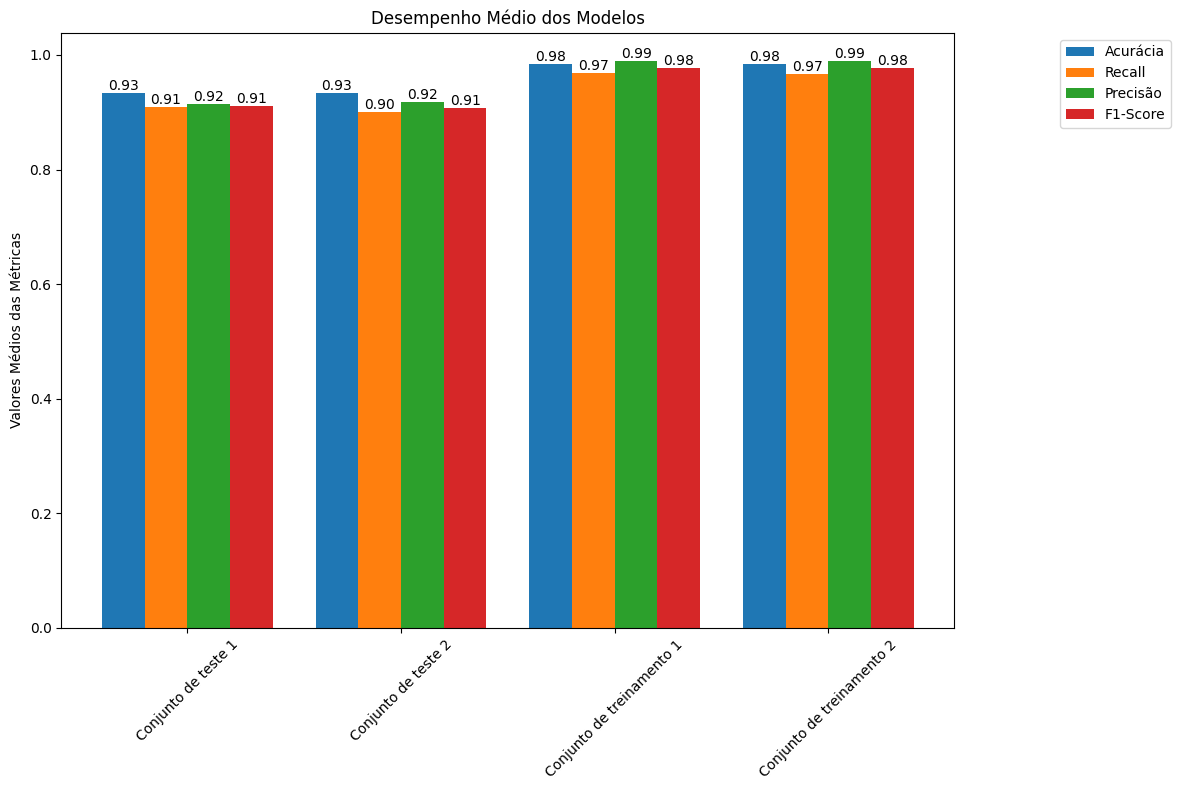

In [ ]:
# Passando as listas de resultados para a função
results = knn(1)

metric_names = ['Acurácia', 'Recall', 'Precisão', 'F1-Score']
model_names = ['Conjunto de teste 1', 'Conjunto de teste 2','Conjunto de treinamento 1', 'Conjunto de treinamento 2']

gerar_graficos_de_barras(results, metric_names, model_names)

Plotando os gráficos de Rede Neural

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver


Conjunto de treinamento 1:
Média de Acurácia: 0.9334400648167402
Média de Recall: 0.9087453047376712
Média de Precisão: 0.9137716358692676
Média de F1 Score: 0.9102527200963917

Conjunto de treinamento 2:
Média de Acurácia: 0.9320417290012402
Média de Recall: 0.8992364518962802
Média de Precisão: 0.9175152802622435
Média de F1 Score: 0.9066700843796055
------------------------------
------------------------------
Conjunto de teste
Acurácia:  0.9473684210526315
Recall:  0.873015873015873
Precision:  0.9821428571428571
f1 Score:  0.9243697478991596
------------------------------
------------------------------


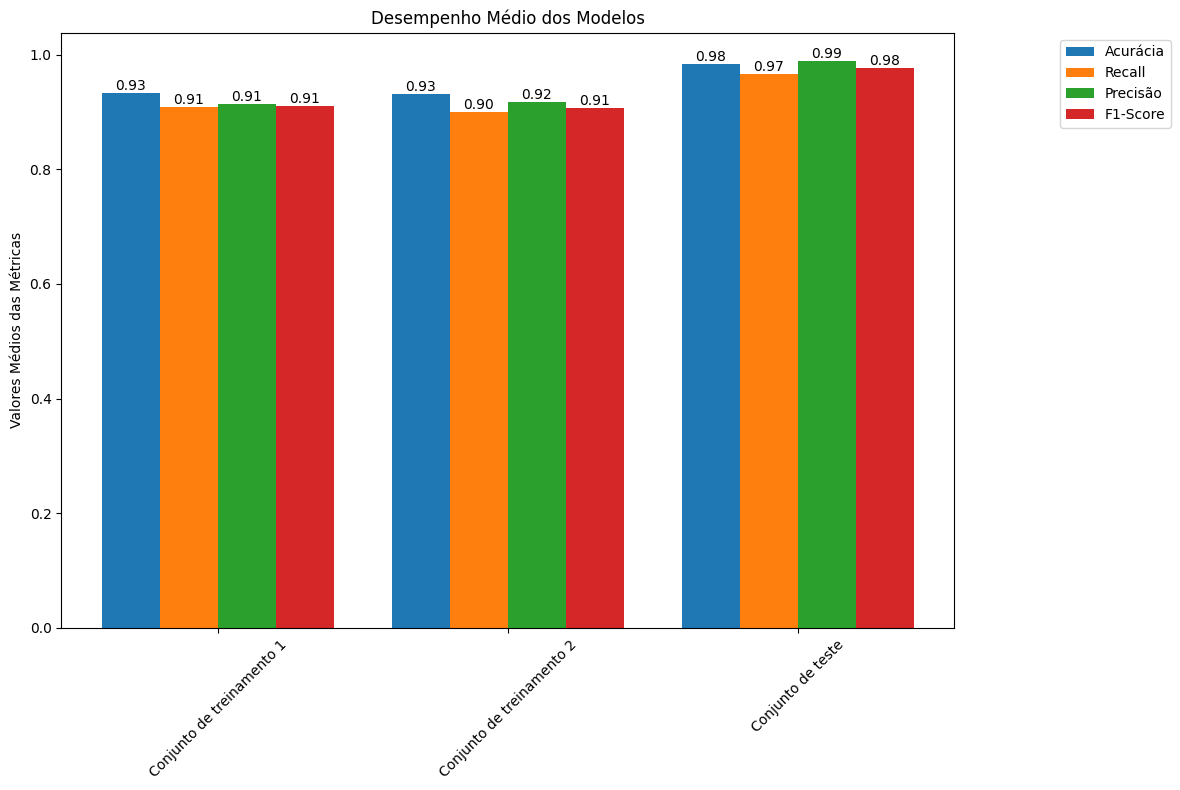

In [ ]:
# Passando as listas de resultados para a função
results = redeNeural(5,'identity')

metric_names = ['Acurácia', 'Recall', 'Precisão', 'F1-Score']
model_names = ['Conjunto de treinamento 1', 'Conjunto de treinamento 2', 'Conjunto de teste']

gerar_graficos_de_barras(results, metric_names, model_names)

Plotando os gráficos de Árvore de decisão

Conjunto de teste 1
Média de Acurácia: 0.9295080839353285
Média de Recall: 0.9089169000933708
Média de Precisão: 0.9027235507698375
Média de F1 Score: 0.9048382999741668

Conjunto de teste 2
Média de Acurácia: 0.9296078431372549
Média de Recall: 0.9082726423902896
Média de Precisão: 0.9035090793836996
Média de F1 Score: 0.9049066243496302

Conjunto de treinamento 1
Média de Acurácia: 0.9830948861956845
Média de Recall: 0.9659732272336419
Média de Precisão: 0.9885768119083401
Média de F1 Score: 0.9768974411159513

Conjunto de treinamento 2
Média de Acurácia: 0.9827845107892405
Média de Recall: 0.9656960756082649
Média de Precisão: 0.9881823352383452
Média de F1 Score: 0.9765588550757581


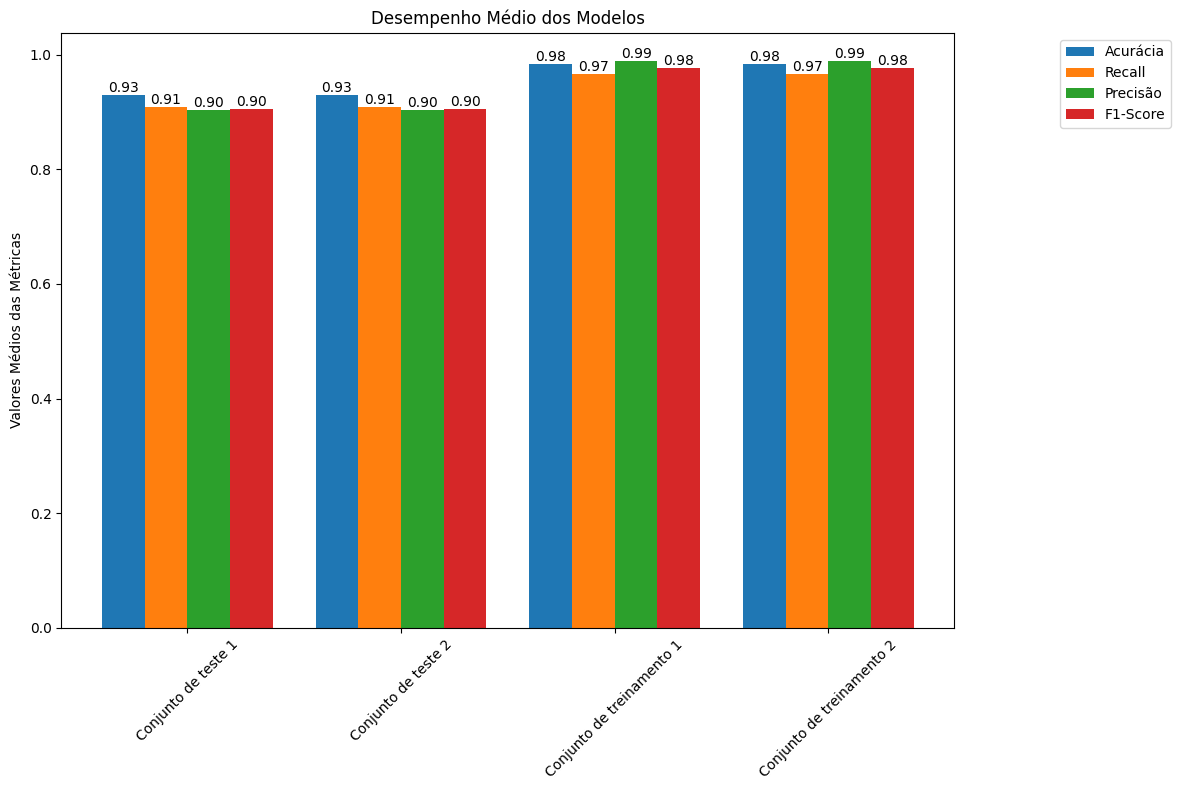

In [ ]:
# Passando as listas de resultados para a função
results = decision_tree(10, 5, 4)

metric_names = ['Acurácia', 'Recall', 'Precisão', 'F1-Score']
model_names = ['Conjunto de teste 1', 'Conjunto de teste 2', 'Conjunto de treinamento 1', 'Conjunto de treinamento 2']

gerar_graficos_de_barras(results, metric_names, model_names)